<a href="https://colab.research.google.com/github/Anand-s-cmd/Deep_learning_POCS/blob/main/Churn_modelling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data_set=pd.read_csv('/content/drive/MyDrive/Deep_learning_things/Churn_Modelling.csv')

In [22]:
data_set.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [23]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
data_set.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
X = data_set.iloc[:, 3:13]
y= data_set.iloc[:, 13]

In [26]:
#Create dummy variables for Categorical features

geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [27]:
type(geography)
type(gender)

pandas.core.frame.DataFrame

In [28]:
#Create dummy variables for Categorical features

X = pd.concat([X,geography,gender],axis=1)

In [29]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0


In [30]:
#drop previous Gender and Geography columns

X=X.drop(['Geography','Gender'],axis=1)

In [31]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  uint8  
 9   Spain            10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [33]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)                        

In [35]:
#Now let's make the ANN!

import keras
from keras.models import Sequential
from keras.layers import Dense#Dense function used to create the layers even Hidden layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [38]:
# Initialising the ANN

classifier = Sequential()# totally empty neural network now it is.

In [39]:
classifier.add(Dense(units =6, kernel_initializer='he_uniform', activation='relu', input_dim=11 ))

In [40]:
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [41]:
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [42]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [43]:
classifier.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Fitting the ANN to the Training set

ann_model=classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.33)

Epoch 1/100
536/536 [==============================] - 5s 9ms/step - loss: 0.0000e+00 - accuracy: 0.6358 - val_loss: 0.0000e+00 - val_accuracy: 0.7914
Epoch 2/100
536/536 [==============================] - 4s 7ms/step - loss: 0.0000e+00 - accuracy: 0.7951 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accura

In [48]:
# list all data in history

print(ann_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


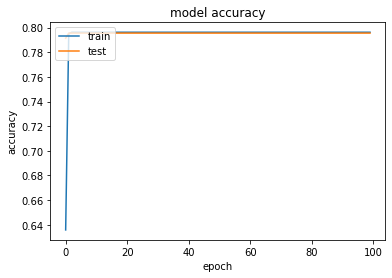

In [49]:

plt.plot(ann_model.history['accuracy'])
plt.plot(ann_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

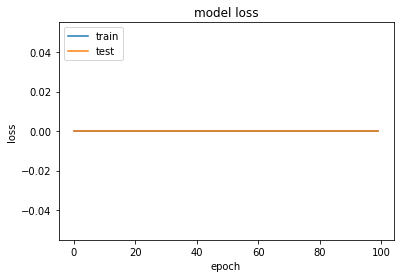

In [51]:
# summarize history for loss

plt.plot(ann_model.history['loss'])
plt.plot(ann_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [53]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [54]:
# Calculate the Accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975